In [19]:
import sys
sys.setrecursionlimit(20_000) # Changing the recursion limit to avoid RecursionError

import time
import random
import numpy as np
from scipy.optimize import curve_fit

## Bubble Sort

In [20]:
# Bubble Sort Implementation

def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp

In [21]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random.shuffle(a)
a

[8, 15, 14, 12, 9, 6, 11, 2, 13, 5, 3, 4, 16, 10, 1, 7]

In [22]:
bubbleSort(a)
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

## Quick Sort

In [23]:
# Quick Sort Implementation

def quickSort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quickSort(arr, low, pivot_index)
        quickSort(arr, pivot_index + 1, high)

def partition(arr, low, high):

    pivot = arr[low]
    left = low + 1
    right = high
    done = False
    while not done:
        while left <= right and arr[left] <= pivot:
            left = left + 1
        while arr[right] >= pivot and right >= left:
            right = right - 1
        if right < left:
            done = True
        else:
            arr[left], arr[right] = arr[right], arr[left]

    arr[low], arr[right] = arr[right], arr[low]
    return right

In [24]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random.shuffle(a)
a

[16, 7, 6, 15, 13, 5, 10, 8, 1, 12, 3, 4, 9, 2, 11, 14]

In [25]:
quickSort(a, 0, (len(a) - 1))
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

## Creating 20 Arrays

In [26]:
# Finding decent array sizes that scale decently

array_sizes = [i ** 3 for i in range(1, 21)]
array_sizes

[1,
 8,
 27,
 64,
 125,
 216,
 343,
 512,
 729,
 1000,
 1331,
 1728,
 2197,
 2744,
 3375,
 4096,
 4913,
 5832,
 6859,
 8000]

## Measuring Bubble Sort

In [27]:
# Measuring Bubble Sort

def measureAverageBubbleSort(array_size):
    
    array = [i for i in range(1, array_size + 1)]
    random.shuffle(array) # Shuffling the array

    start = time.perf_counter()
    bubbleSort(array)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

def measureBestBubbleSort(array_size):

    array = [i for i in range(1, array_size + 1)]
    start = time.perf_counter()
    bubbleSort(array)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

def measureWorstBubbleSort(array_size):

    array = [array_size - i for i in range(1, array_size + 1)]
    start = time.perf_counter()
    bubbleSort(array)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

In [28]:
bubble_best_times = []
for size in array_sizes:
    bubble_best_times.append(measureBestBubbleSort(size))

bubble_average_times = []
for size in array_sizes:
    bubble_average_times.append(measureAverageBubbleSort(size))

bubble_worst_times = []
for size in array_sizes:
    bubble_worst_times.append(measureWorstBubbleSort(size))

## Measuring Quick Sort

In [29]:
# Measuring Quick Sort

def measureBestQuickSort(array_size):
    
    array = [i for i in range(1, array_size + 1)]
    random.shuffle(array)

    start = time.perf_counter()
    quickSort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

def measureAverageQuickSort(array_size):

    array = [i for i in range(1, array_size + 1)]
    random.shuffle(array)

    start = time.perf_counter()
    quickSort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

def measureWorstQuickSort(array_size):

    array = [i for i in range(1, array_size + 1)]
    array.reverse()
    
    start = time.perf_counter()
    quickSort(array, 0, array_size - 1)
    stop = time.perf_counter()
    avg_time = stop - start

    return avg_time

In [30]:
quick_best_times = []
for size in array_sizes:
    quick_best_times.append(measureBestQuickSort(size))

quick_average_times = []
for size in array_sizes:
    quick_average_times.append(measureBestQuickSort(size))

quick_worst_times = []
for size in array_sizes:
    quick_worst_times.append(measureBestQuickSort(size))

## Curve fitting Data

In [31]:
# Curve Fitting

def nSquaredModel(x, a, b):
    return a * x ** 2 + b

def nlognModel(x, a, b):
    return a * (x * np.log(x)) + b

params_bubble_average, _ = curve_fit(nSquaredModel, array_sizes, bubble_average_times)
params_bubble_worst, _ = curve_fit(nSquaredModel, array_sizes, bubble_worst_times)
params_bubble_best, _ = curve_fit(nSquaredModel, array_sizes, bubble_best_times)

params_quick_average, _ = curve_fit(nlognModel, array_sizes, quick_average_times)
params_quick_worst, _ = curve_fit(nSquaredModel, array_sizes, quick_worst_times)
params_quick_best, _ = curve_fit(nlognModel, array_sizes, quick_best_times)


## Plotting

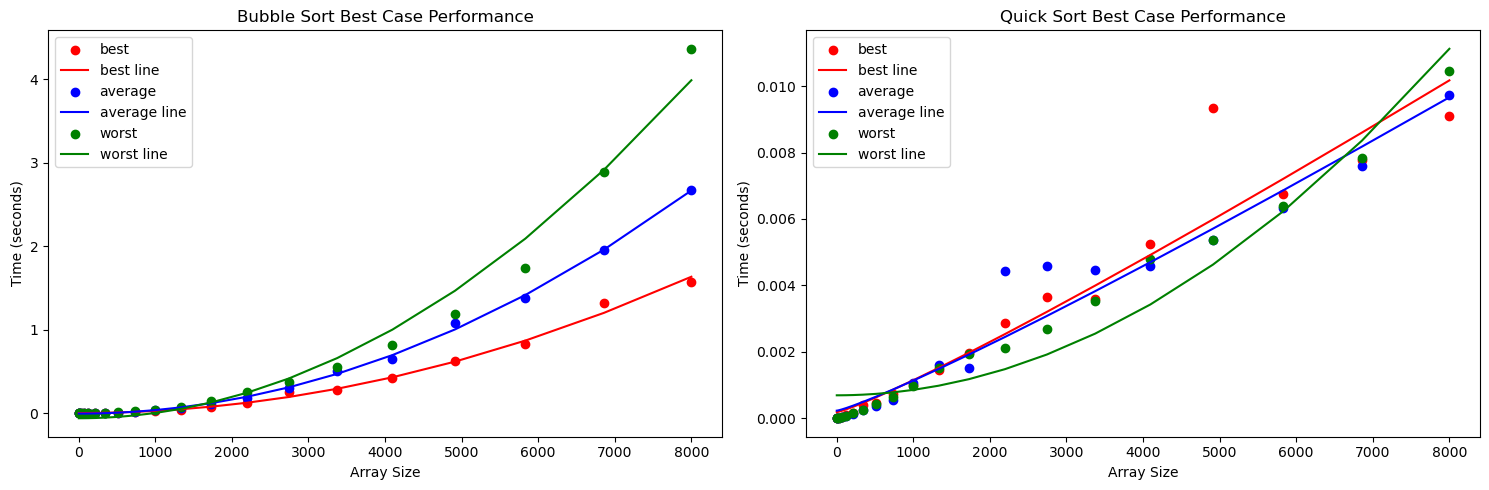

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (15, 5))

bubble = axs[0]
quick = axs[1]

# quicksort = axs[1]

# Bubble Sort Plot
bubble.scatter(array_sizes, bubble_best_times, label='best', color= 'red')
bubble.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_best), label='best line', color='red')

bubble.scatter(array_sizes, bubble_average_times, label='average', color= 'blue')
bubble.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_average), label='average line', color='blue')

bubble.scatter(array_sizes, bubble_worst_times, label='worst', color= 'green')
bubble.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_worst), label='worst line', color='green')

# Quick Sort Plot
quick.scatter(array_sizes, quick_best_times, label='best', color= 'red')
quick.plot(array_sizes, nlognModel(np.array(array_sizes), *params_quick_best), label='best line', color='red')

quick.scatter(array_sizes, quick_average_times, label='average', color= 'blue')
quick.plot(array_sizes, nlognModel(np.array(array_sizes), *params_quick_average), label='average line', color='blue')

quick.scatter(array_sizes, quick_worst_times, label='worst', color= 'green')
quick.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_quick_worst), label='worst line', color='green')

bubble.set_title('Bubble Sort Best Case Performance')
bubble.set_xlabel("Array Size")
bubble.set_ylabel("Time (seconds)")

quick.set_title('Quick Sort Best Case Performance')
quick.set_xlabel("Array Size")
quick.set_ylabel("Time (seconds)")

bubble.legend()
quick.legend()

plt.tight_layout()
plt.show()

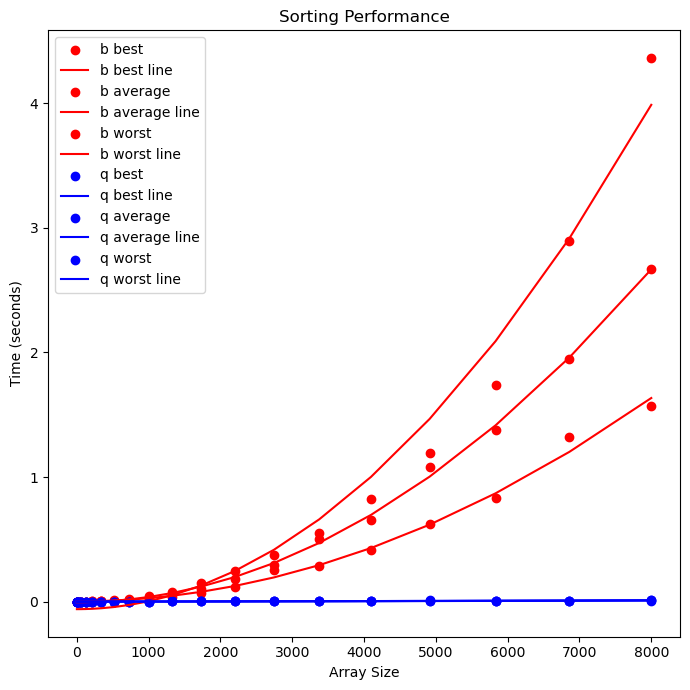

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (7, 7))

# Bubble Sort Plot
ax.scatter(array_sizes, bubble_best_times, label='b best', color= 'red')
ax.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_best), label='b best line', color='red')

ax.scatter(array_sizes, bubble_average_times, label='b average', color= 'red')
ax.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_average), label='b average line', color='red')

ax.scatter(array_sizes, bubble_worst_times, label='b worst', color= 'red')
ax.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_bubble_worst), label='b worst line', color='red')

# Quick Sort Plot
ax.scatter(array_sizes, quick_best_times, label='q best', color= 'blue')
ax.plot(array_sizes, nlognModel(np.array(array_sizes), *params_quick_best), label='q best line', color='blue')

ax.scatter(array_sizes, quick_average_times, label='q average', color= 'blue')
ax.plot(array_sizes, nlognModel(np.array(array_sizes), *params_quick_average), label='q average line', color='blue')

ax.scatter(array_sizes, quick_worst_times, label='q worst', color= 'blue')
ax.plot(array_sizes, nSquaredModel(np.array(array_sizes), *params_quick_worst), label='q worst line', color='blue')

ax.set_title('Sorting Performance')
ax.set_xlabel("Array Size")
ax.set_ylabel("Time (seconds)")

ax.legend()

plt.tight_layout()
plt.show()

## Extra: Python Visualization of Quick Sort

In [33]:
# # Python implementation of the 
# # Sorting visualiser: Quick Sort

# # Imports
# import pygame
# import random
# pygame.font.init()

# # Total window
# screen = pygame.display.set_mode(
# 			(900, 650)
# 		)

# # Title and Icon 
# pygame.display.set_caption("SORTING VISUALISER")

# # Uncomment below lines for setting 
# # up the icon for the visuliser
# # img = pygame.image.load('sort_icon.png')
# # pygame.display.set_icon(img)

# # Boolean variable to run 
# # the program in while loop
# run = True

# # Window size and some initials
# width = 900
# length = 600
# array =[0]*151
# arr_clr =[(0, 204, 102)]*151
# clr_ind = 0
# clr =[(0, 204, 102), (255, 0, 0),\
# 	(0, 0, 153), (255, 102, 0)]
# fnt = pygame.font.SysFont("comicsans", 30)
# fnt1 = pygame.font.SysFont("comicsans", 20)


# # Function to generate new Array
# def generate_arr():
# 	for i in range(1, 151):
# 		arr_clr[i]= clr[0]
# 		array[i]= random.randrange(1, 100)
		
# # Initially generate a array
# generate_arr() 

# # Function to refill the 
# # updates on the window
# def refill():
# 	screen.fill((255, 255, 255))
# 	draw()
# 	pygame.display.update()
# 	pygame.time.delay(30)
	
# # Sorting Algo:Quick sort
# def quicksort(array, l, r):
# 	if l<r:
# 		pi = partition(array, l, r)
# 		quicksort(array, l, pi-1)
# 		refill()
# 		for i in range(0, pi + 1):
# 			arr_clr[i]= clr[3]
# 		quicksort(array, pi + 1, r)
		
# # Function to partition the array
# def partition(array, low, high):
# 	pygame.event.pump() 
# 	pivot = array[high]
# 	arr_clr[high]= clr[2]
# 	i = low-1
# 	for j in range(low, high):
# 		arr_clr[j]= clr[1]
# 		refill()
# 		arr_clr[high]= clr[2]
# 		arr_clr[j]= clr[0]
# 		arr_clr[i]= clr[0]
# 		if array[j]<pivot:
# 			i = i + 1
# 			arr_clr[i]= clr[1]
# 			array[i], array[j]= array[j], array[i]
# 	refill()
# 	arr_clr[i]= clr[0]
# 	arr_clr[high]= clr[0]
# 	array[i + 1], array[high] = array[high], array[i + 1] 
	
# 	return ( i + 1 )
	
# # Function to Draw the 
# # array values
# def draw():
# 	# Text should be rendered
# 	txt = fnt.render("SORT : PRESS 'ENTER'",\
# 					1, (0, 0, 0))
	
# 	# Position where text is placed
# 	screen.blit(txt, (20, 20))
# 	txt1 = fnt.render("NEW ARRAY : PRESS 'R'",\
# 					1, (0, 0, 0))
# 	screen.blit(txt1, (20, 40))
# 	txt2 = fnt1.render("ALGORITHM USED: QUICK SORT",\
# 					1, (0, 0, 0))
# 	screen.blit(txt2, (600, 60))
# 	element_width =(width-150)//150
# 	boundry_arr = 900 / 150
# 	boundry_grp = 550 / 100
# 	pygame.draw.line(screen, (0, 0, 0),\
# 				(0, 95), (900, 95), 6)
	
# 	# Drawing the array values as lines
# 	for i in range(1, 151):
# 		pygame.draw.line(screen,\
# 				arr_clr[i], (boundry_arr * i-3, 100),\
# 				(boundry_arr * i-3,\
# 				array[i]*boundry_grp + 100),\
# 				element_width)
				
# # Program should be run
# # continuously to keep the window open
# while run:
# 	# background
# 	screen.fill((255, 255, 255))
	
# 	# Event handler stores all event 
# 	for event in pygame.event.get():
		
# 		# If we click Close button in window
# 		if event.type == pygame.QUIT:
# 			run = False
# 		if event.type == pygame.KEYDOWN:
# 			if event.key == pygame.K_r:
# 				generate_arr() 
# 			if event.key == pygame.K_RETURN:
# 				quicksort(array, 1, len(array)-1)	 
# 	draw()
# 	pygame.display.update()
	
# pygame.quit()
